In [1]:
from IPython.display import Image

# Kompresja danych poprzez redukcję wymiarowości

## Wstęp

W rozdziale zajmiemy się tematem odkrywania cech (feature extraction):
- __analiza głównych składowych__ w celu kompresowania nienadzorowanych danych
- __liniowa analiza dyskryminacyjna__ jako technika nadzorowanej redukcji wymiarowości  w celu zmaksymalizowania rozdzielności klas
- nieliniowa redukcja wymiarowości za pomocą __jądrowej analizy głównych składowych__

## Nienadzorowana redukcja wymiarowości za pomocą analizy główych składowych 

Stosując alg. wyboru cech dalej przechowujemy wszystkie cechy, natomiast dzięki odkrywaniu cech rzutujemy dane na nową przestrzeń cech (kompresja danych z zachowaniem jak największej informacji). Ogranicza też klątwę wymiarowości.
<br>
__Analiza głównych składowych__ (principal component analysis PCA) to technika nienadzorowanej, liniowej transformacji w celu redukowania wymiarowości. Inne zastosowania:  badawcza analiza danych, usuwanie szumu w transakcji giełdowych, bioinformatyczna analiza genomów oraz ekspansji genów. Umożliwia identyfikowanie wzorców  danych na podstawie korelacji pomiędzy cechami. Krótko mówiąc __zadaniem PCA jest wyszukiwanie kierunków maksymalnej wariancji w wielowymiarowej przestrzeni i rzutowanie ich na nową na podprzestrzeń zawierająco tyle samo lub mniej wymiarów.__  Osie ortogonalne (główne składowe) w nowej przestrzeni symbolizują kierunki max wariancji (ograniczenie osie cech są ułożone prostopadle do siebie). Na rys $x_1$ i $x_2$ to pierwotne osie cech, a PC1 i PC2 to główne składowe. 

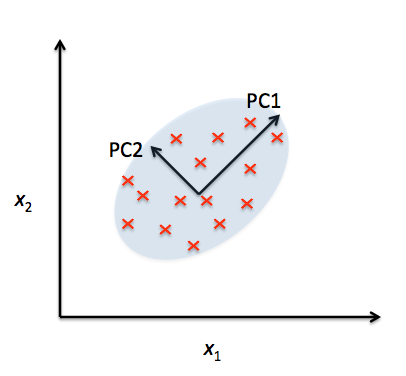

In [2]:
Image(filename='./rysunki/rozdzial 5/05_01.png',width=400)

W przypadku stosowania PCA do redukowania wymiarowości tworzymy $d \times  k$-wymiarową macierz transformacji __W__, która umożliwia rzutowanie wektora x na nową , k-wymiarową podprzestrzeń cech mniejszą niż d-wymiarowa pierwotna przestrzeń
$$x=[x_1,x_2,...,x_d], x \in \mathbb{R}^d$$
$$\downarrow xW, \quad W \in \mathbb{R}^{d\times k}$$
$$z=[z_1,z_2,...,z_k], z \in \mathbb{R}^k$$

## Wyjaśniona wariancja całkowita 

Wczytujemy dane wine

In [3]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns= df_wine.columns = ['Etykieta klas', 'Alkohol', 'Kwas jabłkowy', 'Popiół', 
'Zasadowość popiołu', 'Magnez', 'Całk. zaw. fenoli', 
'Flawonoidy', 'Fenole nieflawonoidowe', 'Proantocyjaniny', 
'Intensywność koloru', 'Odcień', 'Transmitancja 280/315 nm', 'Prolina']
df_wine.head()

,Etykieta klas,Alkohol,Kwas jabłkowy,Popiół,Zasadowość popiołu,Magnez,Całk. zaw. fenoli,Flawonoidy,Fenole nieflawonoidowe,Proantocyjaniny,Intensywność koloru,Odcień,Transmitancja 280/315 nm,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc= StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std =sc.transform(X_test)


Rozdzielenie danych na uczące i testowe oraz standaryzacja cech

---

**Uwaga**

Przez przypadek wprowadziłem zapis `X_test_std = sc.fit_transform(X_test)` zamiast `X_test_std = sc.transform(X_test)`. W tym przypadku nie odczujemy wielkiej róznicy, ponieważ wartość średnia i odchylenie standardowe zestawu testowego powinny mieć podobne wartości, jak w przypadku zestawu uczącego. Jak jednak pamiętamy z rozdziału 3., właściwym rozwiązaniem jest ponowne wykorzystanie parametrów zestawu uczącego w celu przeprowadzenia jakiejkolwiek transformacji -- zestaw danych testowych powinien pełnić funkcję "nowych, nieznanych" próbek.

Popełniona przeze mnie literówki ukazuje powszechny błąd popełniany przez wiele osób, które *nie* wykorzystują parametrów otrzymanych z uczenia / tworzenia modelu i standaryzują dane "od podstaw". Poniżej wyjaśniam, dlaczego może to stanowić problem.

Załóżmy, że mamy jakiś prosty zestaw uczący składający się z trzech próbek i jednej cechy (nazwijmy ją sobie "długość"):

- train_1: 10 cm -> class_2
- train_2: 20 cm -> class_2
- train_3: 30 cm -> class_1

wartość średnia: 20, odchylenie standardowe: 8.2

Po przeprowadzeniu standaryzacji, wartości przekształconej cechy są następujące:

- train_std_1: -1.21 -> class_2
- train_std_2: 0 -> class_2
- train_std_3: 1.21 -> class_1

Przyjmijmy teraz, że nasz model nauczył się klasyfikować próbki przy ustandaryzowanej wartości cechy < 0,6 dla klasy 2 (w przeciwnym wypadku próbki należą do klasy 1). Jak na razie wszystko się zgadza. Powiedzmy teraz, że mamy trzy nieopisane punkty danych, które chcemy sklasyfikować:

- new_4: 5 cm -> class ?
- new_5: 6 cm -> class ?
- new_6: 7 cm -> class ?

Jeżeli spojrzymy na "nieustandaryzowane" wartości cechy w naszym zestawie danych uczących, to na pierwszy rzut oka stwierdzimy, że najprawdopodobniej wszystkie te próbki będą przynależeć do klasy 2. Jeżeli jednak dokonamy standaryzacji tychże danych poprzez ponowne obliczenie odchylenia standardowego i średniej, otrzymamy podobne wartości, jak w przypadku zbioru uczącego, a klasyfikator zidentyfikowałby (raczej niepoprawnie) próbki 4 i 5 jako elementy klasy 2.

- new_std_4: -1.21 -> class 2
- new_std_5: 0 -> class 2
- new_std_6: 1.21 -> class 1

Gdybyśmy jednak użyli parametrów otrzymanych ze standaryzacji zestawu uczącego, otrzymalibyśmy rezultat:

- sample5: -18.37 -> class 2
- sample6: -17.15 -> class 2
- sample7: -15.92 -> class 2

Długości 5 cm, 6 cm i 7 cm są znacznie mniejsze od wszelkich wartości znajdujących się w zestawie danych uczących. Zatem jedynym logicznym wyjaśnieniem jest stwierdzenie, że standaryzowane cechy tych "nowych próbek" są znacznie mniejsze od analogicznych cech ze zbioru uczącego.

---

Symetryczna macierz kowariancji o wymairach $d\times d$  przechowuje pary kowariancji łączące poszczególne cechy
$$ \sigma _{jk}= \frac{1}{n} \sum _{i=1} ^n {(x_j^{(i)} - \mu _j)(x_k^{(i)} - \mu _k)}$$

Parametry $\mu _j$ i $\mu _k$ to wartości średnie cech, odpowiednio j i k. Po standaryzacji wynoszą 0. Dodatnia kowariancja pomiędzy dwiema cechami wskazuje, że wartości sparowanych cech wspólnie rosną lub maleją,  ujemna informuje, że zmieniają sięw przeciwnych kierunkach.  Dla przykładu 3 cech macierz kowariancji.
\begin{equation*}
\Sigma =
\begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \sigma_{13} \\
\sigma_{21} & \sigma_{2}^2 & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_{3}^2 \\
\end{bmatrix}
\end{equation*}

Wektory własne macierzy kowariancji symbolizują główne składowe (kierunki maksymalnej wariancji) a wartości własne definiują rozmiar tych składowych. W zestawie wine możemy otrzymać 13 wektorów własnych przechowanych w wektorze kowariancji 13x13.
<br>
Wektor własny spełnia następujący warunek:
$$ \Sigma{v} =\lambda {v}$$

$\lambda$ to wartość własna, v to wektor własny. 

In [5]:
import numpy as np
cov_mat= np.cov(X_train_std.T)
eigen_vals, eigen_vecs= np.linalg.eig(cov_mat)
#lub np.linalg.eigh
print('\nWartości własne \n%s'% eigen_vals)
print('\nWektory w własne \n%s'% eigen_vecs)


Wartości własne 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]

Wektory w własne 
[[ 1.46698114e-01  5.04170789e-01 -1.17235150e-01  2.06254611e-01
  -1.87815947e-01 -1.48851318e-01 -1.79263662e-01 -5.54687162e-02
  -4.03054922e-01 -4.17197583e-01  2.75660860e-01  4.03567189e-01
   4.13320786e-04]
 [-2.42245536e-01  2.42168894e-01  1.49946576e-01  1.30489298e-01
   5.68639776e-01 -2.69052764e-01 -5.92636731e-01  3.32731614e-02
  -1.01833706e-01  2.17101488e-01 -8.13845005e-02 -1.52474999e-01
  -8.78560762e-02]
 [-2.99344215e-02  2.86984836e-01  6.56394387e-01  1.51536318e-02
  -2.99209426e-01 -9.33386061e-02  6.07334578e-02 -1.00618575e-01
   3.51841423e-01  1.28549846e-01 -1.29751275e-02  1.68376064e-01
  -4.52518598e-01]
 [-2.55190023e-01 -6.46871827e-02  5.84282337e-01 -9.04220851e-02
  -4.12499478e-02 -1.01342392e-01  2.50323869e-01  5.61658566e-02
  -5.00457282e-01  4.73344124e-02

Chcemy zmniejszyć wymiarowość danych, dlatego interesuje nas podzbiór wektorów własnych zawieracych najwięcej informacji (Wariancję). Wartości własne definiują rozmiar wektorów własnych, szeregujemy w malejącej kolejości. Szukamy k największych wektorów na podstawie ich wartości własnych. Narysujmy wykres współczynników wariancji wyjaśnionej dla wartości własnych np. $\lambda_j$, gdzie wynosi on:
$$ \frac{\lambda_j}{\sum_{j=1}^d{\lambda_j}}$$


In [6]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp= np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14),var_exp, alpha=0.5, align='center', label= 'Pojedyncza wariancja wyjaśniona')
plt.step(range(1,14),cum_var_exp,where='mid',label='Łączna wariancja wyjaśniona')
plt.xlabel('Główne składowe')
plt.ylabel('Współczynnik wariancji wyjaśnionej')
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

Jak widać na rysunku sama pierwsza główna składowa stanowi niemal 40% wariancji,a 2 pierwsze składowe dają 60% wariancji analizowanego zestawu danych. Przypomina rys. wykres istotności cech w lesie losowym z poprzedniego rozdzialu, jednak PCA jest nienadzorowane, informacje na temat etykiet klas są ignorowane.

## Transformacja cech 

Uszeregujemy pary własne w kierunku malejącym wartości własnych, z wyselekcjonowanych wektorów własnych utworzymy macierz rzutowania i wykorzystamy do przeniesienia do podprzestrzeni z mniejszą liczbą cech.

Szeregowanie par własnych malejąco:

In [7]:
eigen_pairs=[(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

Teraz wybieramy 2 wketory własne, które łącznie dają nam największą wartość wariancji.

In [8]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
#[:,newaxis] transponuje w pewien sposób
print('Macierz W:\n',w)

Macierz W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


Powyższy kod tworzy macierz rzutowania W o wymiarze 13x2, stąd możemy przenieść próbkę x(1x13) w podprzestrzeń PCA (1x2)
$$x'=xW$$

In [9]:
X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

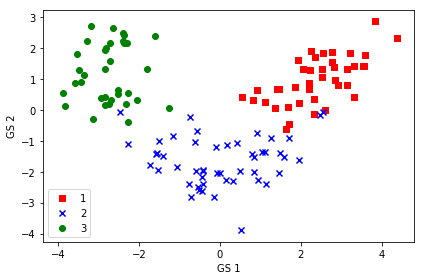

In [10]:
X_train_pca= X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('GS 1')
plt.ylabel('GS 2')
plt.legend(loc='lower left')
plt.tight_layout()
#plt.savefig('./rysunki/05_03.png', dpi=300)
plt.show()

Analizując wykres, widać, że dane zostały rozproszone bardziej wzdłuż osi x (pierwsza główna składowa) co jest zgodne z wykresem współczynnika wariancji zaprezentowanego powyżej. Klasyfikator nawet przy 2 cechach powinien sobie poradzić z rozdzieleniem klas.

## Analiza głównych składowych  w interfejsie scikit-learn

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

PCA w scikit-learn

In [12]:
from sklearn.decomposition import PCA

pca=PCA()
X_train_pca =pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

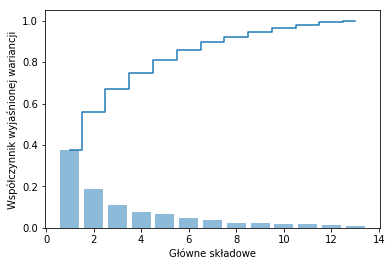

In [13]:
plt.bar(range(1,14),pca.explained_variance_ratio_,alpha=0.5,align ='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Współczynnik wyjaśnionej wariancji')
plt.xlabel('Główne składowe')
plt.show()

Tworzenie modelu w oparciu o PCA


In [14]:
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

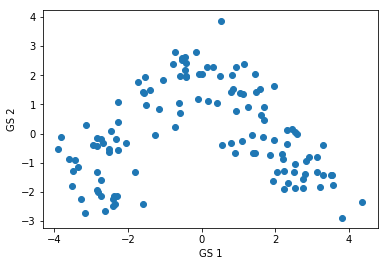

In [15]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.xlabel('GS 1')
plt.ylabel('GS 2')
plt.show()

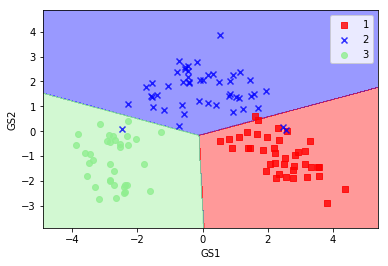

In [16]:
lr= lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train, classifier=lr)
plt.xlabel('GS1')
plt.ylabel('GS2')
plt.legend(loc='best')
plt.show()

W porównaniu z implementacją reczną widzimy lustrzane odbicie próbek, bez znaczenia. Wektory własne mogą mieć różne znaki.

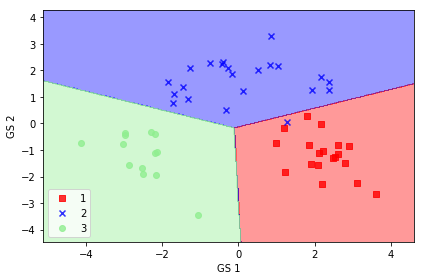

In [17]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('GS 1')
plt.ylabel('GS 2')
plt.legend(loc='lower left')
plt.tight_layout()
#plt.savefig('./rysunki/05_04.png', dpi=300)
plt.show()

Zauważmy, że mimo zredukowania 13 cech do 2 algorytm regresji logistycznej sprawuje się nieźle, jedna próbka źle sklasyfikowana.

## Nadzorowanie kompresji danych za pomocą liniowek analizy dyskryminacyjnej 

__Liniowa Analiza Dyskryminacyjna__ linear discriminant analysis LDA: jest stosowana jako technika odkrywania cech do poprawienia skuteczności obliczenioweji zmniejszenia przetrenowania wynikającego z klątwy wymiarowości w nieregularyzowanych modelach.

Przypomina PCA, celem jest zdefiniowanie takiej podprzestrzeni cech, która umożliwiałaby optymalne rozdzielenie klas. I PCA i LDA należą do kategorii technik transforamcji liniowej pozwalającej na zmniejszenie wymiarów danych, analiza PCA jest nienadzorowana, LDA-nadzorowana.

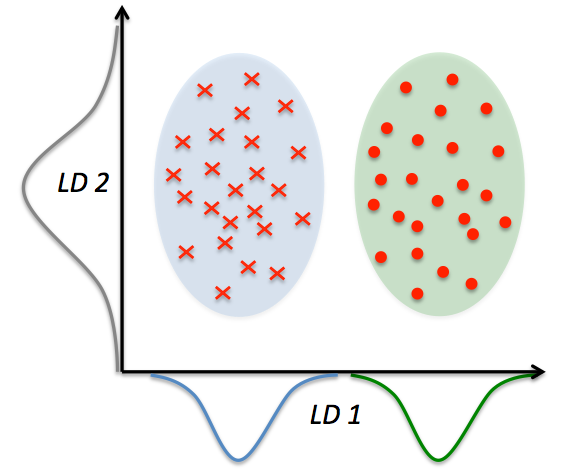

In [18]:
Image(filename='./rysunki/rozdzial 5/05_06.png', width=400) 

Jak widzimy na rysunku liniowa dyskryminanta może dobrze rozdzielać objęte rozkładem normalnym klasy wzdłuż osi X (LD1). Wzdłuż osi Y nie jest zbyt skuteczna, brakuje rozróżnienia klas.

Założenia LDA:
- rozkład normalny danych
- takie same macierze kowariancji
- cechy statystycznie niezależne
- nawet jeśli naruszymy którąś z zasad i tak LDA sprawuje się dobrze.

Etapy algorytmu:
1. Standaryzowanie d-wymiarowego zestawu danych
2. Obliczenie d-wymiarowego wektora średnich dla każdej klasy.
3. Utworzenie międzyklasowej macierzy rozproszenia $S_B$ oraz węwnątrzklasowej macierzy rozproszenia $S_W$
4. Wyliczenie wektorów własnych i wartości własnychz macierzy $S_W^-1 S_B$
5. Wybór k wektorów własnych odpowiadających k największym wartościom własnym w celu utworzenia dxk-wymiarowej macierzy transformacji W, wketory własne tworzą kolumy tej macierzy
6. Rzutowanie próbek na nową podprzestrzeń cech za pomocą macierzy transformacji W

##  Obliczenie macierzy rozproszenia

Pomijamy pierwszy etap, standaryzacja cech dokonana w poprzednim podrozdziale. Obliczamy więc wektory średnie. <br>
Każdy wektor średni przechowauje uśrednioną wartośćcehcy $\mu _m$ w odniesieniu do próbek klasy i:
$$m_i= \frac{1}{n_i} \sum_{x \in D_i}^c {x_m}$$

Otrzymujemy w ten sposób trzy wektory średnich:
\begin{equation}
m_i= \begin{bmatrix}
\mu_{i,Alkohol} \\
\mu_{i, Kwas Jabłkowy}\\
\vdots \\
\mu_{i,Prolina}
\end{bmatrix}^{T}
=i \in \{1,2,3 \}
\end{equation}

In [19]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('UW %s: %s\n'%(label, mean_vecs[label-1]))
    

UW 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

UW 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

UW 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



Korzystając z wektorów średnich możemy oliczyć wewnątrzklasową macierz rozproszenia $S_W$:

$$S_W= \sum_{i=1}^c {S_i}$$
Dokonujemy tego sumując pojedyncze macierze rozproszenia poszczególnych klas: 
$$S_i= \sum_{x \in D_i} ^c (x-m_i)(x-m_i)^T$$

In [20]:
d = 13 # liczba cech
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d)) # macierz rozproszenia dla każdej cechy
    for row in X_train_std[y_train == label]:#każdy wiersz a więc wszystkie próbki dla danej cechy
        row, mv = row.reshape(d, 1), mv.reshape(d, 1) # tworzy wektory kolumnowe
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter                             # sumuje klasy macierzy rozproszenia

print('Wewnątrzklasowa macierz rozproszenia: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Wewnątrzklasowa macierz rozproszenia: 13x13


Przyjmujemy założenie, że etykiety klas w zestawie danych uczących mają rozkład normalny, a jednak nie mają:

In [21]:
print ('Rozkłąd etykiet klas: %s' %np.bincount(y_train)[1:])

Rozkłąd etykiet klas: [40 49 35]


Chcą wyskalować pojedyncze macierze rozproszenia przed ich zsumowaniem do $S_W$.  Podzieliwszy macierze rozproszenia przez liczbęklas $N_i$ możemy się przekonać, że obliczenie maicerzy rozproszenia to wyliczenie macierzy kowariancji $\Sigma _i$

$$ \Sigma _i= \frac{1}{N_i} S_W= \frac{1}{N_i}\sum_{x \in D_i} ^c (x-m_i)(x-m_i)^T$$

In [22]:
d=13 #liczba cech
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Skalowana wewnątrzklasowa macierz rozproszenia: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Skalowana wewnątrzklasowa macierz rozproszenia: 13x13


Możemy teraz obliczyć macierz rozproszenia: 
$$S_B= \sum_{i=1}^c{N_i(m_i-m)(m_i-m)^T}$$

gdzie m oznacza średnią wyliczoną z próbek znajdujących się we wszystkich klasach

In [23]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i +
                1, :].shape[0]  #liczba próbek z daną etykietą (40 49 lub 35)
    mean_vec = mean_vec.reshape(d, 1)  #tworzy wektor kolumnowy
    mean_overall = mean_overall.reshape(d, 1)  #tworzy wektor kolumnowy
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print(
    'Międzyklasowa macierz rozproszenia: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Międzyklasowa macierz rozproszenia: 13x13


In [24]:
S_B

array([[ 72.549 ,  10.1509,  30.4349, -36.9554,  21.4982,  34.6692,
         31.1055, -18.3914,  10.7602,  51.4069,  -7.5057,  10.231 ,
         72.2652],
       [ 10.1509,  39.0069,  15.3272,  22.8751,   0.4806, -39.5667,
        -51.7325,  31.3465, -32.6026,  44.4773, -50.8565, -55.7604,
        -13.8346],
       [ 30.4349,  15.3272,  16.0274,  -7.244 ,   8.2744,   1.4636,
         -3.4672,   2.2736,  -5.5304,  32.5455, -17.8161, -12.5503,
         23.2642],
       [-36.9554,  22.8751,  -7.244 ,  39.7512, -12.8366, -50.8027,
        -57.6929,  34.678 , -30.9313,   1.6344, -33.3403, -47.886 ,
        -54.6782],
       [ 21.4982,   0.4806,   8.2744, -12.8366,   6.5404,  13.26  ,
         12.9885,  -7.7306,   5.482 ,  12.7262,   1.1248,   6.8773,
         23.0242],
       [ 34.6692, -39.5667,   1.4636, -50.8027,  13.26  ,  69.0574,
         81.1418, -48.873 ,  45.4488, -19.4945,  55.2712,  72.475 ,
         62.8312],
       [ 31.1055, -51.7325,  -3.4672, -57.6929,  12.9885,  81.1418,
  

## Dobór dyskryminant liniowych dla nowej podprzestrzeni cech 

Pozstałe etapy LDA podobne do PCA. Rozwiązujemy uogólniony problem wartości własnych dla macierzy $S_w^{-1} S_B$


In [25]:
eigen_vals, eigen_vecs= np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

Szeregujemy wartości własne w malejącej kolejności:

In [26]:
# tworzy listę krotek (wartość własna, wektor własny)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# szereguje krotki (wartość własna, wektor własny) w malejącej kolejności
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# potwierdza wizualnie, że lista została właściwie uszeregowana w malejącej kolejności wartości własnych

print('Wartości własne w malejącej kolejności:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Wartości własne w malejącej kolejności:

452.72158124497435
156.43636121952323
1.0564670343472254e-13
3.996418537019543e-14
3.409235652909593e-14
2.842170943040401e-14
1.4793035293048285e-14
1.4793035293048285e-14
1.3494134504023504e-14
1.3494134504023504e-14
6.491059855852737e-15
6.491059855852737e-15
2.655812157040677e-15


W analizie LDA liczba liniowych dyskryminant wynosi co najwyzej c-1, gdzie c to etykiety klas, gdyż $S_B$ to suma c macierzy pierwszego lub niższego rzędu. Wartości od 3 do ostatniej wynikają z arytmetyki zmiennoprzecinkowej (wynoszą zero). Wygenerujemy wykres wartości własnych jak przy PCA.

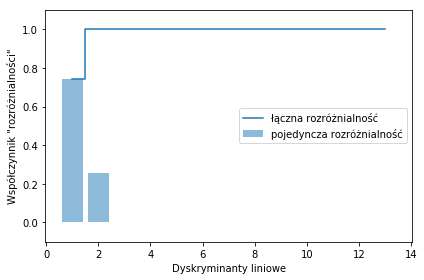

In [27]:
tot =sum(eigen_vals.real) #całkowita suma wartości własnych
discr=[(i/tot) for i in sorted(eigen_vals.real,reverse=True)] # pojedyncze wartości krok po kroku własne znormalizowane (od 0 do 1)
cum_discr=np.cumsum(discr)
plt.bar(range(1,14),discr,alpha=0.5, align='center', label='pojedyncza rozróżnialność')
plt.step(range(1,14),cum_discr,where='mid',label='łączna rozróżnialność')
plt.ylabel('Współczynnik "rozróżnialności"')
plt.xlabel('Dyskryminanty liniowe')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('./rysunki/05_07.png', dpi=300)
plt.show()


Łączymy dwie kolumny wektorów własnych w macierz transformacji W:

In [28]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real))
print('Macierz W:\n',w)

Macierz W:
 [[-0.0662 -0.3797]
 [ 0.0386 -0.2206]
 [-0.0217 -0.3816]
 [ 0.184   0.3018]
 [-0.0034  0.0141]
 [ 0.2326  0.0234]
 [-0.7747  0.1869]
 [-0.0811  0.0696]
 [ 0.0875  0.1796]
 [ 0.185  -0.284 ]
 [-0.066   0.2349]
 [-0.3805  0.073 ]
 [-0.3285 -0.5971]]


## Rzutowanie próbek na nową przestrzeń cech

Przekształcamy próbki: X'=XW

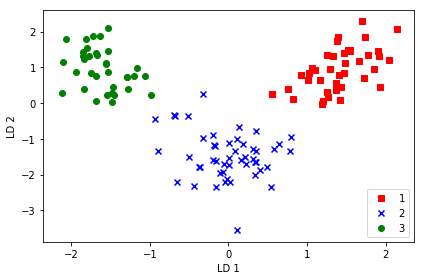

In [29]:
X_train_lda =X_train_std.dot(w)
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0] * (-1), 
                X_train_lda[y_train==l, 1] * (-1), 
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./rysunki/05_08.png', dpi=300)
plt.show()

3 klasy zestawu danych Wine są teraz rozdzielne liniowo.

## LDA w scikit-learn 

In [30]:
if Version(sklearn_version) < '0.18':
    from sklearn.lda import LDA
else:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

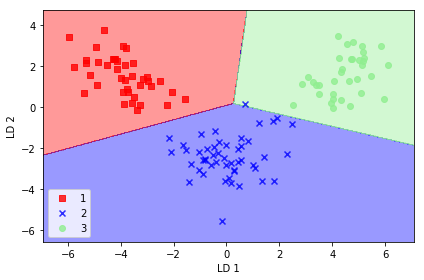

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
#plt.savefig('./rysunki/05_09.png', dpi=300)
plt.show()

Tylko jedna próbka jest klasyfikowana nieprawidłowo, sprawdzmy działanie LDA dla danych testowych:

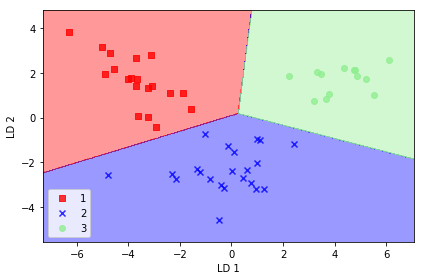

In [32]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
#plt.savefig('./rysunki/05_10.png', dpi=300)
plt.show()

Wnioski: doskonała skuteczność dla danych testowych mimo zmniejszenia cech z 13 do 2!!!

## Jądrowa analiza głównych składowych jako metoda odwzrowania nierozdzielnych liniowo klas

Uwagi początkowe: założenie liniowej rozdzielności np. perceptron idealne rozdzielenie liniowe danych uczących <br>
Brak doskonałej rozdzielności-> zaszumienie układu np. Adaline , regresja logistyczna czy SVM. PCA i LDA jako techniki transformacji liniowej służące do redukci wymiarowości mogą okazać się nieskuteczne w prawdziwym świecie. 

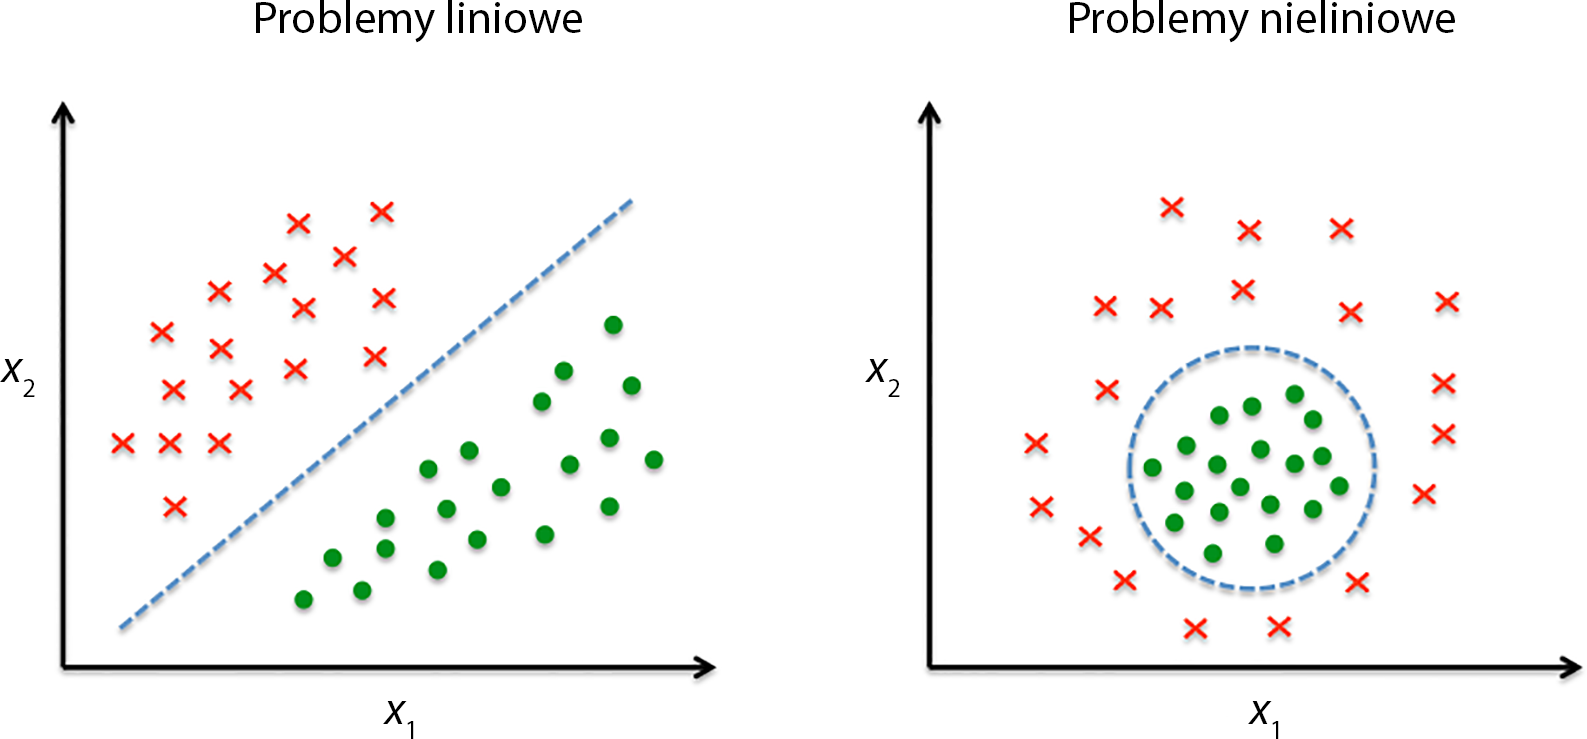

In [33]:
Image(filename='./rysunki/rozdzial 5/05_11.png', width=500) 

Stąd kernelizacja PCA czyli __jądrowa analiza głównych składowych__

## Funkcje jądra oraz sztuczka z funkcją jądra 

Aby przenieść próbki $ \textbf{x} \in \mathcal{R}^d$ do k-wymiarowej podprzestrzeni cech definiujemy funkcję odwzrowującą:
$$ \phi: \mathcal{R}^d \rightarrow \mathcal{R}^k \space (k\gg d)$$

Funkcję $\phi$ możemy interpretować w tak sposób, że tworzy ona nielionowe kombinacje pierwotnych cech, które następnie są rzutowane na podprzestrzeń.
$$x= [x_1, x_2]^T$$
$$ \downarrow \phi$$
$$ z =[x_1^2,\sqrt{2x_1x_2},x_2^2]^T$$

Innymi słowy, za pomocą jądrowej analizy PCA przperowadzamy nieliniowe odwzorowanie danych umożliwiające ich rzutowanie na większą liczbę wymiarów, z kolei poprzez standardową analizę głównych składowych powracamy do przestrzeni o mniejszej liczbie wymiarów. Proces ten złożony jest obliczeniowo, stąd sztuczka z funkcją jądra. Dzięki niej wyliczamy prawdopodobieństwo pomiędzy 2 wielowymiarowymi wektorami cech w pierwotnej przestrzeni cech.

Najpierw powrót do PCA-> kowariancja między 2 cechami i przy założeniu standaryzacji cech:
$$ \sigma = \frac{1}{n}\sum_{i=1}^n{x_j^{(i)}x_k^{(i)}}$$
Po uogólnieniu:
$$ \Sigma = \frac{1}{n}\sum_{i=1}^n{{\mathbf{x}_j^{(i)} \mathbf{x}_k^{(i)}}^T}$$
Po uogólnieniu według _Kernel Principal Component Analysis_, 1997, s.583-588 możemy za pomocą funkcji $\phi$ podmienić iloczyny skalarne próbek w pierwotnej przestrzeni cech na nieliniowe kombinacje cech:
$$ \Sigma = \frac{1}{n}\sum_{i=1}^n{{\phi(\mathbf{x}_j^{(i)}) \phi(\mathbf{x}_k^{(i)}})^T}$$


Aby otrzymać wektory własne z tej macierzy kowariancji rozwiązujemy równanie:
$$\Sigma \mathbf{\nu}= \lambda \mathbf{\nu}$$ 
$$ \Rightarrow \Sigma = \frac{1}{n}\sum_{i=1}^n{{\phi(\mathbf{x}_j^{(i)}) \phi(\mathbf{x}_k^{(i)}})^T}  \quad \mathbf{\nu}= \lambda \mathbf{\nu}$$
$$ \Rightarrow \Sigma = \frac{1}{n \lambda}\sum_{i=1}^n{{\phi(\mathbf{x}_j^{(i)}) \phi(\mathbf{x}_k^{(i)}})^T} \quad \nu=\frac{1}{n} \sum_{i=1}^n{\mathbf{a}^{(i)}\phi(\mathbf{x}^{(i)})}$$

Tutaj $\lambda$  i $\mathbf{\nu}$ to wartości własne macierzy kowariancji $\Sigma$. Wartości wektora __a__ uzyskamy poprzez wydobycie wektorów własnych z macierzy jądra (podobieństwa) __K__.

Macierz jądra wyprowadzamy: <br>
Zapisujemy macierz kowariancji w notacji macierzowej, gdzie $\mathbf{\phi}=(\mathbf{X})$ to macierz $n \times k$:

$$ \Sigma = \frac{1}{n}\sum_{i=1}^n{{\phi(\mathbf{x}_j^{(i)}) \phi(\mathbf{x}_k^{(i)}})^T}= \frac{1}{n}\phi(\mathbf{X})^T \phi(\mathbf{X})$$
Teraz możemy zapisać równanie  wektora własnego:
$$\nu=\frac{1}{n} \sum_{i=1}^n{\mathbf{a}^{(i)}\phi(\mathbf{x}^{(i)})}=\lambda \phi(\mathbf{X})^T \mathbf{a}$$
Ponieważ $\Sigma \nu= \nu$ otrzymujemy:
$$\frac{1}{n}\phi(\mathbf{X})^T\phi(\mathbf{X})\phi(\mathbf{X})^T\textbf{a}$$
Po przmnożeniu przez $\phi(\mathbf{X})$:
!!!skracam tutaj rozwiązanie z książki, trzeba doczytać:
$$\Rightarrow \frac{1}{n} \mathbf{Ka}=\lambda \mathbf{a}$$
gdzie __K__ jest macierzą podobieństwa (jądra):
$$ \mathbf{K}= \phi(\mathbf{X})\phi(\mathbf{X})^T$$

Sztuczkę z funkcją jądra wykorzystujemy w celu uniknięcia jawnego obliczania par iloczynów skalarnych x wewnątrz funkcji $\phi$ i dlatego wprowadzamy funkcję jądra __K__ dzięki czemu nie wyliczamy jawnie wektorów własnych:

$$K=\phi(\mathbf{X})\phi(\mathbf{X})^T$$

W wyniku jądrowej analizy głównych składowych otrzymujemy próbki już rzutowane na odpowiednią podprzestrzeń wektorów własnych, w standardowej analizie PCA tworzyliśmy w tym celu macierz transformacji. Funkcję jądra możemy interpretować jako funkcję obliczają iloczyn skalarny 2 wektorów- miarę podobieństwa.

Najpopularniejsze f. jądra:
- wielomianowa funkcja jądra $k(x^{(i)},x^{(i)})= (x^{(i)T}x^{(j)} + \theta)^p$ ,gdzie $\theta$ to parametr progowy 
- jądra tangensa hiperbolicznego $k(x^{(i)},x^{(i)})= tanh(\eta x^{(i)T}x^{(j)} + \theta)$
- jądro radialnej funkcji bazowej $k(x^{(i)},x^{(i)})= exp(- \gamma \rvert \rvert  x^{(i)}-x^{(i)}\rvert \rvert ^2)$

Poszczególne etapy implementacji jądra RBF w analizie głównych składowych: 
1. Obliczamy macierz jądra (podobieństwa) k za pomocą powyższego wzoru dla każdej pary próbek. Jeśli nasz zestaw danych składa się ze 100 próbek uczących, symetryczna macierz jądra par podobieństwa miałaby wymiar 100x100.
2. Centrujemy macierz jądra k przy użyciu równania
$$K'= K-1_nK-K1_n+1_nK1_n$$
gdzie $1_n$ oznacza n-wymiarową macierz o wartościach 1/n.
3. Na podstawienie odpowiednich wartości własnych (uszeregowanych w malejącej kolejności) dobieramy k największych wektorów własnych wycentrowanej macierzy jądra. W przeciwieństwie standardowej analizy PCA tutaj wektory własne nie są osiami głównych składowych , lecz próbkami rzutowanymi na te osie.

## Implementacja jądrowej analizy głównych składowych w Pythonie

In [34]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np


def rbf_kernel_pca(X, gamma, n_components):
    """"
    Implementacja jądra RBF w analizie PCA.

    Parametry
    ------------
    X: {typ ndarray biblioteki NumPy}, wymiary = [n_próbek, n_cech]
        
    gamma: liczby zmiennoprzecinkowe
      Parametr strojenia jądra RBF
        
    n_components: liczby całkowite
      Liczba zwracanych głównych składowych

    Zwraca
    ------------
     X_pc: {typ ndarray biblioteki NumPy}, wymiary = [n_próbek, k_cech]
       Rzutowany zestaw danych   

    """
    #oblicza kwadraty odległości euklidesowych par
    #w zestawie danych o rozmiarze MxN
    sq_dists = pdist(X, 'sqeuclidean')

    #przekształca wyliczone odległości na macierz kwadratową
    mat_sq_dists = squareform(sq_dists)

    #oblicza symetryczną macierz jądra
    K = exp(-gamma * mat_sq_dists)
    #centruje macierz jądra
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    #wydobywa pary własne z centrowanej macierzy jądra
    #funkcja numpy.eigh zwraca je w malejącej kolejności
    eigvals, eigvecs = eigh(K)
    #wybiera k największych wektorów własnych(rzutowanych próbek)
    X_pc = np.column_stack(
        (eigvecs[:, -i] for i in range(1, n_components + 1)))
    return X_pc

## Rozdzielenie sierpowatych kształtów

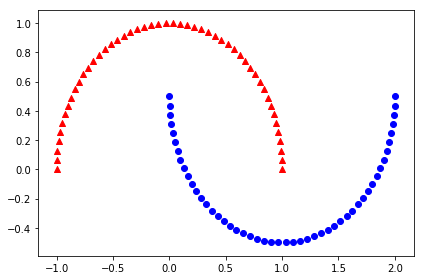

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o')

plt.tight_layout()
plt.show()

Kształty są liniowo nierozdzielne, zostaną przekształcone za pomocą jądrowej PCA by były liniowo rozdzielne, najpierw klasyczny PCA:

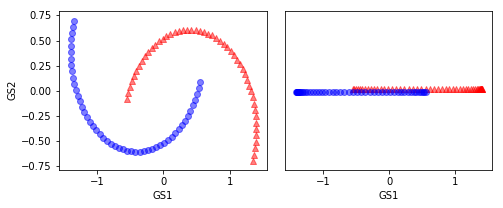

In [36]:
from sklearn.decomposition import PCA
scikit_pca= PCA(n_components=2)
X_spca= scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('GS1')
ax[0].set_ylabel('GS2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('GS1')

plt.tight_layout()
#plt.savefig('./rysunki/05_13.png', dpi=300)
plt.show()

Można zauważyć, że zwykła PCA nie potrafi sobie poradzić z rozdzieleniem klas, widać to dokładnie na rysunku 2, gdze jest tylko 1 składowa.

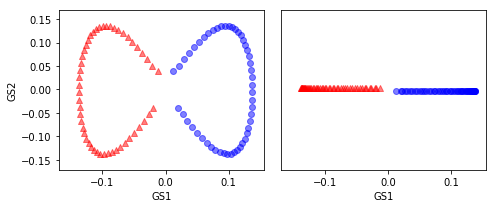

In [37]:
X_kpca= rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('GS1')
ax[0].set_ylabel('GS2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('GS1')

plt.tight_layout()
#plt.savefig('./rysunki/05_14.png', dpi=300)
plt.show()

Jak widać na rysunku obydwie klasy są idealnie rozdzielone liniowo, dzięki czemu można je wykorzystać do uczenia alg. klasyfikujących.
Nie istnieje  idealna wartość parametru gamma, w nast. rozdziale podane będą techniki pozwalające na zautomatyzowanie procesu optymalizacji takich parametrów strojeniowych.

## Rozdzielenie koncentrycznych kręgów

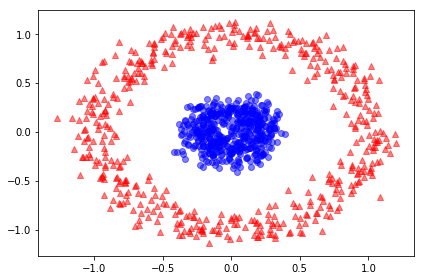

In [39]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./rysunki/05_15.png', dpi=300)
plt.show()

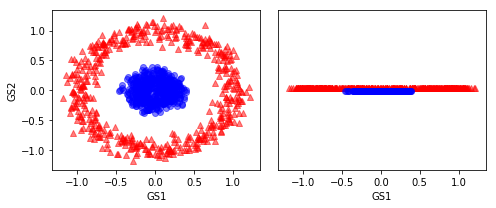

In [40]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('GS1')
ax[0].set_ylabel('GS2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('GS1')

plt.tight_layout()
#plt.savefig('./rysunki/05_16.png', dpi=300)
plt.show()

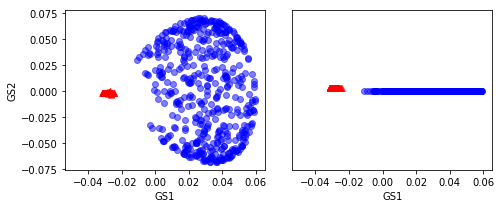

In [41]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('GS1')
ax[0].set_ylabel('GS2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('GS1')

plt.tight_layout()
#plt.savefig('./rysunki/05_17.png', dpi=300)
plt.show()

##  Rzutowanie nowych punktów danych

Rzutowanie danych np. testowych, które pierwotnie nie należą do zestawu uczącego. Musimy wykorzystywać pierwotny zestaw danych podczas każdorazowego rzutowania nowych próbek. Obliczamy jądro (podobieństwo) RBF pomiędzy i-tą próbką zbioru danych uczących a nową próbką x'.


$$\phi(x')^Tv= \sum_i{a^{(i)}phi(x')^T\phi(x^{(i)})}= \sum_i{a^{(i)}k(x',x^{(i)})^T}$$

Tutaj wektory własne a i wartości własne $\lambda$ macierzy jądra K spełniają następujący warunek : __Ka__=$\lambda$__a__

Modyfikujemy rbf_kernel_pca w taki sposób aby były zwracane warości macierzy jądra.

In [44]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np


def rbf_kernel_pca(X, gamma, n_components):
    """"
    Implementacja jądra RBF w analizie PCA.

    Parametry
    ------------
    X: {typ ndarray biblioteki NumPy}, wymiary = [n_próbek, n_cech]
        
    gamma: liczby zmiennoprzecinkowe
      Parametr strojenia jądra RBF
        
    n_components: liczby całkowite
      Liczba zwracanych głównych składowych

    Zwraca
    ------------
     X_pc: {typ ndarray biblioteki NumPy}, wymiary = [n_próbek, k_cech]
       Rzutowany zestaw danych   
     lambdas: lista
         Wartości własne

    """
    #oblicza kwadraty odległości euklidesowych par
    #w zestawie danych o rozmiarze MxN
    sq_dists = pdist(X, 'sqeuclidean')

    #przekształca wyliczone odległości na macierz kwadratową
    mat_sq_dists = squareform(sq_dists)

    #oblicza symetryczną macierz jądra
    K = exp(-gamma * mat_sq_dists)
    #centruje macierz jądra
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    #wydobywa pary własne z centrowanej macierzy jądra
    #funkcja numpy.eigh zwraca je w malejącej kolejności
    eigvals, eigvecs = eigh(K)
    #wybiera k największych wektorów własnych(rzutowanych próbek)
    alphas = np.column_stack(
        (eigvecs[:, -i] for i in range(1, n_components + 1)))
    #wybiera odpowiednie wartości własne 
    lambdas= [eigvals[-i] for i in range(1,n_components+1)]
    return alphas, lambdas

Tworzymy nowe sierpowate kształty i testujemy nasz program

In [46]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [47]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [50]:
x_proj=alphas[25]#oryginalne rzutowanie

In [51]:
x_proj

array([0.0788])

In [52]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

# rzutowanie "nowego" punktu danych
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj 

array([0.0788])

__Przeanalizować powyższy fragment kodu !!!!!__

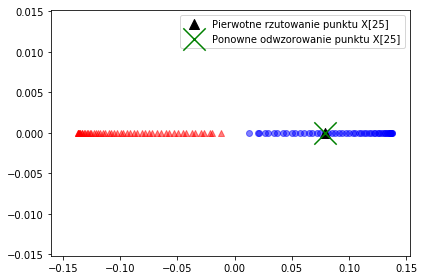

In [53]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), 
            color='red', marker='^',alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), 
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='Pierwotne rzutowanie punktu X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='Ponowne odwzorowanie punktu X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)

plt.tight_layout()
#plt.savefig('./rysunki/05_18.png', dpi=300)
plt.show()

## Algorytm jądrowej analizy głównych składowych w bibliotece scikit-learn 

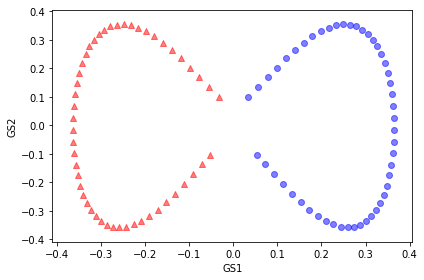

In [55]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], 
            color='blue', marker='o', alpha=0.5)

plt.xlabel('GS1')
plt.ylabel('GS2')
plt.tight_layout()
#plt.savefig('./rysunki/05_19.png', dpi=300)
plt.show()

Zaawansowane techniki nieliniowej redukcji wymiarowości  pod adresem http://scikit-learn.org/stable/modules/manifold.html